# </a><center>Palmer Penguins Exploratory Data Analysis</center>

---

by *Irina Simoes*

**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
  - [About the dataset](#toc1_1_)    
  - [Analysis goal](#toc1_2_)    
- [Load Libraries & Dataset](#toc2_)    
  - [Import all the required libraries for the analysis](#toc2_1_)    
  - [Acquiring and loading the dataset](#toc2_2_)    
- [Overview & Basic Exploration](#toc3_)    
  - [Check for the DataFrame dimensionality](#toc3_1_)    
  - [Get a first look at the data](#toc3_2_)    
  - [Generate descriptive statistics](#toc3_3_)    
- [Data Cleaning & Wrangling](#toc4_)    
  - [Missing values](#toc4_1_)    
  - [Checking for outliers](#toc4_2_)    
  - [Duplicated data](#toc4_3_)    
- [Univariate Analysis](#toc5_)    
    - [Categorical variables](#toc5_1_1_)    
    - [Numeric variables](#toc5_1_2_)    
- [Bivariate Analysis](#toc6_)    
  - [Sample distribution in each island](#toc6_1_)    
  - [Sex distribution across species and islands](#toc6_2_)    
  - [Attribute pairs by species](#toc6_3_)    
  - [Attribute pairs by island](#toc6_4_)    
- [Multivariate Analysis](#toc7_)    
  - [Correlation](#toc7_1_)    
  - [Best fit](#toc7_2_)    
- [Notes](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---
## <a id='toc1_'></a>[Introduction](#toc0_)

### <a id='toc1_1_'></a>[About the dataset](#toc0_)

This notebook explores the different variables of [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/articles/intro.html), which was first introduced by Allison Horst, Alison Hill, and Kristen Gorman in 2020. The dataset is a collection of data about three different species of penguins inhabiting the Palmer Archipelago near Palmer Station in Antarctica, which were collected from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network.

### <a id='toc1_2_'></a>[Analysis goal](#toc0_)
For this exploratory data analysis <sup>[1][2][3][4][5]</sup>, we will focus on exploring the data to gain insights on the underlying attributes with the end goal of uncovering patterns and identifying dependencies. Namely, we will seek to explore the [correlation between two of the variables](https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f), regardless of whether they are causal or not.

<sup>
References:
<br>[1] <a href="https://www.geeksforgeeks.org/exploratory-data-analysis-in-python">Exploratory Data Analysis</a>
<br>[2] <a href="https://www.geeksforgeeks.org/exploratory-data-analysis-in-python-set-1/">Exploratory Data Analysis in Python | Set 1</a>
<br>[3] <a href="https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/">What is Exploratory Data Analysis?</a>
<br>[4] <a href="https://medium.com/@nomannayeem/mastering-exploratory-data-analysis-eda-a-comprehensive-python-pandas-guide-for-data-insights-c0be7c5b8889">Mastering Exploratory Data Analysis (EDA): A Comprehensive Python (Pandas) Guide for Data Insights and Storytelling</a>
<br>[5] <a href="https://towardsdatascience.com/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6
https://medium.com/@nomannayeem/">A Data Scientist’s Essential Guide to Exploratory Data Analysis</a>
</sup>

---
## <a id='toc2_'></a>[Load Libraries & Dataset](#toc0_)

### <a id='toc2_1_'></a>[Import all the required libraries for the analysis](#toc0_)
* [Seaborn](https://seaborn.pydata.org/): Data visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.

* [Pandas](https://pandas.pydata.org): Fundamental data analysis and manipulation library built on top of the Python programming language. It offers data structures and operations for manipulating numerical tables and time series.

* [Numpy](https://numpy.org/): It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.

* [Matplotlib](https://matplotlib.org/): Essential for creating static, animated,  and interactive visualizations in Python. It is closely integrated with NumPy and provides a MATLAB-like interface for creating plots and visualizations.

* [Warnings](https://docs.python.org/3/library/warnings.html): In-built Python library to suppress warnings.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

### <a id='toc2_2_'></a>[Acquiring and loading the dataset](#toc0_)

As stated in the [official documentation for the Seaborn library](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), datasets can be loaded from an [online repository](https://github.com/mwaskom/seaborn-data):

First by executing `get_dataset_names()` to confirm if Palmer Penguins is indeed listed as one of the 
of available datasets;

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Secondly by calling `seaborn.load_dataset()` function with the actual database name, namely penguins, we load it into our project. The dataset returned is a [DataFrame object by default](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), as the Seaborn library is closely [integrated with pandas data structures](https://seaborn.pydata.org/tutorial/introduction). Consequently, the loaded dataset comprises a [2-dimensional data structure](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) with rows and columns.

In [3]:
# Load the dataset
df = sns.load_dataset("penguins")

# Surpress warnings for a cleaner look
warnings.filterwarnings('ignore')

---
## <a id='toc3_'></a>[Overview & Basic Exploration](#toc0_)

We should get a basic understanding of the data structure, format, and characteristics by inspecting the dataset's dimension, data types, presence of missing values and/or duplicate records, as well as exploring some initial summary statistics. In order to achieve this we'll be using methods and attributes available through pandas DataFrame object. <sup>[1]</sup><sup>[2]</sup>


<sup>[1] <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html">pandas.DataFrame Official Documentation</a>
</sup><br><sup>[2] <a href="https://medium.com/codex/10-efficient-ways-for-inspecting-a-pandas-dataframe-object-3f66563e2f2">10 Efficient Ways for Inspecting a Pandas DataFrame Object</a>


### <a id='toc3_1_'></a>[Check for the DataFrame dimensionality](#toc0_)

**Rationale:** The goal is to return a summary with the column headers, total number of rows and columns, count of non-null values, and data types, as per [pandas official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). We can then understand the size and structure of the dataset before performing further analysis. 

**Findings:**

* The set contains 344 rows and 7 columns.
* 4 variables are numeric with type ``float64``: _culmen length in mm, culmen depth in mm, flipper length in mm, and body mass in grams_.
* 3 variables are categorical with type ``object``: _species, island, and sex_. 
* 5 of the columns have missing values, which means we'll have to some data wrangling and clean up before any data analsysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### <a id='toc3_2_'></a>[Get a first look at the data](#toc0_)

In [25]:
print("-------- Head -------- \n") 
df.head()

-------- Head -------- 



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [26]:
print("-------- Tail -------- \n") 
df.tail()

-------- Tail -------- 



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


### <a id='toc3_3_'></a>[Generate descriptive statistics](#toc0_)


**Rationale:** 
Understand the distribution of numerical data with percentile attribution and a provide a quick summary that will helps us understand the penguins' characteristics central tendency, variability, and range.<sup>[1]</sup> It includes the following statistics:<sup>[2]</sup>

- Count: This represents the number of non-null values in the dataset for each column.

- Mean: It's a measure of central tendency, as it constitutes the average value of the data.

- Standard deviation: It indicates how spread out the values are around the mean. A higher standard deviation means the values are more spread out from the mean, while a lower standard deviation means the values are closer to the mean.

- Minimum: It represents the lowest observed value in the dataset.

- First quartile (25th percentile): It's a value below which 25% of the observations lie. 

- Second quartile (50th percentile): It represents the median, separating the higher half from the lower half of the data. 

- Third quartile (75th percentile): It's a value below which 75% of the observations lie. 

- Maximum: It represents the highest observed value in the dataset.

**Findings:**  Key interpretations can be made from this function, both for the quantitative and categorical data. All of these observations require further exploration on an individual basis.

- Null values: Confirming the observations made from `.info`, the count of rows does not match the count of values for _bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g,_ and _sex_. 

- Outliers: _body_mass_g_ max value seems to be significantly greater than the mean, median and 75th percentile, which can potentially indicate the presence of outliers. 

- Number of classes: _sex_ column contains two categories, while species and islands are multi-class, indicating three different categories. Further validation required when examining the categorical variables.

<sup>References:
<br>[1] <a href="https://medium.com/codex/9-efficient-ways-for-describing-and-summarizing-a-pandas-dataframe-316234f46e6">9 Efficient Ways for Describing and Summarizing a Pandas DataFrame</a>
<br>[2] <a href="https://medium.com/@muralimanohar6/leveraging-the-way-you-interpret-the-descriptive-statistics-in-python-bd2111fb5211">Leveraging the way you interpret the “Descriptive Statistics” in Python</a></sup>

In [6]:
# By default, describe() includes only numeric columns, so the param include 
# should be specified for variables of object data type
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


---
## <a id='toc4_'></a>[Data Cleaning & Wrangling](#toc0_)

### <a id='toc4_1_'></a>[Missing values](#toc0_)

As seen in the descriptive summary above, the dataset contains a few missing values which should be investigated. To detect these missing values, we use the `isna()` method <sup>[1]</sup><sup>[2]</sup> to return an onject with boolean values, where True indicates if the values are Not a Number (NaN).

<sup>
References:
<br>[1] <a href="https://pandas.pydata.org/docs/user_guide/missing_data.html">Working with missing data</a>
<br>[2] <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna">pandas.DataFrame.isna</a></sup>

In [7]:
# Sum the total of missing values by variable
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
# Display rows with missing values
df[df['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


There are a total of 11 rows with missing data, 3 of which only contain input for species and island, and the remaining 9 are only missing sex. There are different ways of handling missing values: <sup>[1]</sup><sup>[2]</sup><sup>[3]</sup>
- Fill missing data with Pandas `interpolate()` and `fillna()`, or using machine learning libraries such as Scikit-Learn;
- Remove those rows with Pandas [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna).

Given the goal of this exercise, finding the correlation between two variables, we'll be dropping the rows with missing values to guarantee its accuracy. 


<sup>
References:
<br>[1] <a href="https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/">Working with Missing Data in Pandas</a>
<br>[2] <a href="https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html">Handling Missing Data</a>
<br>[3] <a href="https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/">KNNImputer: A robust way to impute missing values (using Scikit-Learn)</a>
<br>[4] <a href="https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe">Stack Overflow</a></sup>

In [9]:
# Drop rows where at least one element is missing. As per Pandas official documentation referenced above,
# the 'inplace' parameter must be specified as True, otherwise a copy will be returned
df.dropna(inplace=True)

# Verify once again if empty rows were dropped combining isna() with any() to get a boolean value,
# where False indicates the Dataframe does not contain null values
df.isna().values.any()

False

Apart from standard missing values that Pandas can detect (such as NaN), data might also be missing in various other formats, including "N/A", "na", "-", or represented as 0. According to the article [Data Cleaning with Python and Pandas: Detecting Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b), these formatting inconsistencies can be detected by using the following logic:

- Loop through each column in the dataset;
- Attempt to convert the value to a integer with the int() function
    - If the column is *categorical* and the value **is converted**, it suggests formatting inconsistencies. In such cases, replace the value is replaced with Numpy's `np.nan` as [_a poor man's mask_](https://numpy.org/doc/stable/user/misc.html), and increment the counter by 1. Otherwise, no action is taken.
    - If the column is *numerical* and the value **is not converted**, it indicates the presence of string values, so these are replaced as NaN and the counter is incremented by 1. If conversion is successful, we take no action.


In [10]:
'''
The code and logic for the below functions were taken from the above reference, but the adaption to the two functions was 
orchestrated by myself to fit tha analysis specific needs. I have encountered an error while deploying the function, which
has been solved with the help of a Stack Overflow post https://stackoverflow.com/questions/16476924/how-can-i-iterate-over-rows-in-a-pandas-dataframe
'''

''' ------- Function to detect integers in categorical columns ------- '''
def detect_int_categorical_columns(df, column):
    # Start counter of null values to be used in the below loop
    count_nulls = 0

    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        try:
            int(row[column])    # Try to convert the value to an integer
            df.loc[index, column] = np.nan # If the value is converted, enter a missing value with Numpy and Pandas loc https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
            count_nulls += 1 # Increment the null count after the conversion 

        except ValueError: # Otherwise, we know the value is a string, so we caught the error and use a pass statement to avoid getting an exception
            pass # https://www.w3schools.com/python/ref_keyword_pass.asp

    # Return the count of values converted to NaN
    return count_nulls


''' ------- Function to detect text in numerical columns ------- '''
def detect_txt_numerical_columns(df, column):
    # Start counter of null values to be used in the below loop
    count_nulls = 0

    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        try:
            int(row[column]) # Try to convert the value to an integer
            pass # If the value is converted, do nothing as we know there aren't format inconsistencies

        except ValueError: # Otherwise, we know the value is a string, so we caught the error and:
            df.loc[index, column] = np.nan  # enter a missing value with Numpy
            count_nulls += 1                # increment the null count if the value is converted

    # Return the count of values converted to NaN
    return count_nulls

# Call the functions and wrap them in print statements
print(detect_int_categorical_columns(df,'species'))
print(detect_int_categorical_columns(df,'island'))
print(detect_int_categorical_columns(df,'sex'))

print(detect_txt_numerical_columns(df,'bill_length_mm')) 			
print(detect_txt_numerical_columns(df,'bill_depth_mm')) 
print(detect_txt_numerical_columns(df,'flipper_length_mm')) 
print(detect_txt_numerical_columns(df,'body_mass_g')) 

# Final verification on potential missing values after running the replacement functions
null_values = df.isnull().values.any()
print(f'Number replacements made with np.nan() due to inconsistent formats: {null_values}')

0
0
0
0
0
0
0
Number replacements made with np.nan() due to inconsistent formats: False


### <a id='toc4_2_'></a>[Checking for outliers](#toc0_)

As seen in [*Generate descriptive statistics with pandas `.describe` method*](#toc3_3_) section, the `body_mass_g` column requires further investigation in regards to potential outliers, given that the quartile figures reveal that most penguins are below 5kg, yet the maximum value is above 6kg.

The **first step** will be extract from the DataFrame the entries that fit the above mentioned criterium for sanity check. To achieve this, we'll use Pandas `query()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) which takes a query expression as a string parameter and indexes the result as a boolean value, returning the DataFrame where the result is True according to the query expression.<sup>[1]</sup>

<sup>
References:
<br>[1] <a href="https://www.w3schools.com/python/pandas/ref_df_query.asp">Pandas DataFrame query() Method</a>


In [11]:
# Create a container for the DataFrame query as we do not wish to change the original dataset
outliers = df.copy()

# Filter the DataFrame to display rows with potential outliers
outliers = outliers.query("body_mass_g > 4750.00")
               
# Display rows where the query expression is True
outliers

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male
189,Chinstrap,Dream,52.0,20.7,210.0,4800.0,Male
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


By examining the queried DataFrame, it seems that the majority of values stem from the species Gentoo in the island of Biscoe. This takes us to the **next step**, which will be visualising the original DataFrame with [Seaborn's library boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) with a breakdown by species and island to confirm if there are indeed outliers or if Gentoo penguins are generally heavier than the other species. 

Boxplots<sup>[1]</sup> are useful to depict the data distribution and potential outliers:
- The limits indicate the range of the central 50% of the data;
- The central line marks the median value;
- The vertical lines extended from each box  capture the range of the remaining data; 
- Dots placed past the line edges to indicate the presence of outliers.

<sup>References:
<br>[1] <a href="https://www.atlassian.com/data/charts/box-plot-complete-guide">A complete guide to box plots</a>
</sup>


<Axes: xlabel='island', ylabel='body_mass_g'>

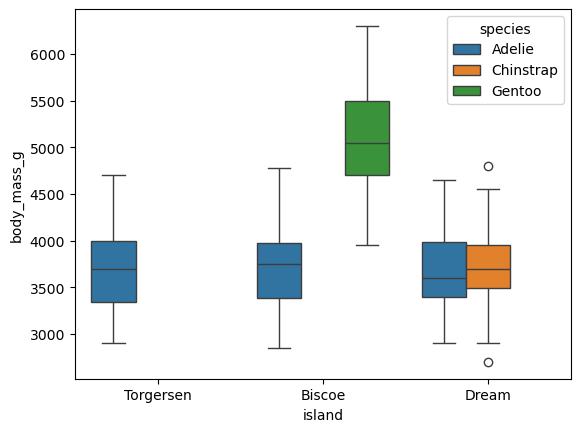

In [12]:
# Create a boxplot with potential body_mass_g outliers, focusing on getting a breakdown by species
sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = df)

The above visualisation tells us that Gentoo penguins tend to be heavier, indicating that the data does not have any anomaly. However, there are two Chinstrap penguins which values would be considered outliers. Therefore, as a **final step**, we'll proceed to examine these entries and decide whether to keep or drop them by using the [Inter Quartile Range (IQR) approach](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/).

Given that the IQR measures the middle 50% of the data, outliers are typically defined by statisticians as data points that fall 1.5 times above the third quartile or below the first quartile.<sup>[1]</sup> Therefore, the formulas that define the outliers thresholds are:

$$ \text{Lower Bound} = Q_1 - 1.5 \times \text{IQR} $$
$$ \text{Upper Bound} = Q_3 + 1.5 \times \text{IQR} $$

<sup>References:
<br>[1] <a href="https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule">Identifying outliers with the 1.5xIQR rule</a>
</sup>

In [13]:
# Calculate the upper and lower limits
Q1 = df['body_mass_g'].quantile(0.25) # The 1st quartile is the value below which 25% of the data can be found
Q3 = df['body_mass_g'].quantile(0.75) # The 3rd quartile is the value below which 75% of the data falls

# Calculate the IQR, which measures the middle 50% of the data
IQR = Q3 - Q1

# Calculate the outlier thresholds as per the above formulas
# Any data point below/above these values are considered outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
 
# Create arrays of Boolean values indicating the outlier rows using Numpy’s `where function
# to find indices of all data points where body_mass_g does meets the threshold condition
# https://numpy.org/doc/stable/reference/generated/numpy.where.html
upper_array = np.where(df['body_mass_g'] >= upper)[0]
lower_array = np.where(df['body_mass_g'] <= lower)[0]

# Display outliers arrays
print(f'Lower IQR array: {lower_array}')
print(f'Upper IQR array: {upper_array}')

Lower IQR array: []
Upper IQR array: []


Both the `upper_array` and `lower_array` containers are empty, which means that no outliers were detected above or below the calculated thresholds and therefore no further cleanup is required.

### <a id='toc4_3_'></a>[Duplicated data](#toc0_)

The final verification before proceeding to core data analysis focus on examining the existence of duplicate rows in the dataset with Pandas' `duplicated()` method, which combined with the `keep=False` parameter, will return a boolean series with all the duplicate rows marked as True. 

As seen in the below empty DataFrame, this dataset does not contain any duplicated entries.

<sup>
References:
<br>[1] <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html">pandas.DataFrame.duplicated</a>
<br>[2] <a href="https://realpython.com/python-for-data-analysis/#removing-duplicate-data">Using Python for Data Analysis</a></sup>



In [14]:
# Display DataFrame's duplicated rows with .loc()
df.loc[df.duplicated(keep=False)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


---

## <a id='toc5_'></a>[Univariate Analysis](#toc0_)

We already had a preview all variables present in the dataset. However, in order to get a deep understanding of each of them as well as their types, we'll proceed to examine and classify both numerical and categorical features separately.

#### <a id='toc5_1_1_'></a>[Categorical variables](#toc0_)

As seen in [Check for the DataFrame dimensionality with pandas `.info()` method](#toc3_1_) section, the dataset contains three self-explanatory object type features which are classified as strings in native Python types. Categorical data represent characteristics and contain textual informative that don't have mathematical meaning. <sup>[1][2]</sup>

To further understand classification from the statistical point of view, let's fetch the unique values of each one of these variables using Pandas [`unique()`method](https://pandas.pydata.org/docs/reference/api/pandas.unique.html).


<sup>References:
<br>[1] <a href="https://www.dummies.com/article/academics-the-arts/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal-169735/">Types of Statistical Data: Numerical, Categorical, and Ordinal</a>
<br>[2] <a href="https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html">Data Types and Formats</a></sup>

In [15]:
print(f'Species: {df["species"].unique()}')
print(f'Sex: {df["sex"].unique()}')
print(f'Island: {df["island"].unique()}')

Species: ['Adelie' 'Chinstrap' 'Gentoo']
Sex: ['Male' 'Female']
Island: ['Torgersen' 'Biscoe' 'Dream']


Given the above, we can conclude that all three variables are best classified as nominal categorical data, as neither of them has a meaningful order or ranking associated:
- `island` refers to the names of the islands where the penguins are located;
- `sex` indicates the gender of the penguins;
- `species` refers to the species names of the penguins.

To understand the significance of each of these features, we'll use Matplotlib's [`subplots` utility wrapper](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to create [countplots with Seaborn's library](https://seaborn.pydata.org/generated/seaborn.countplot.html) in a single call.

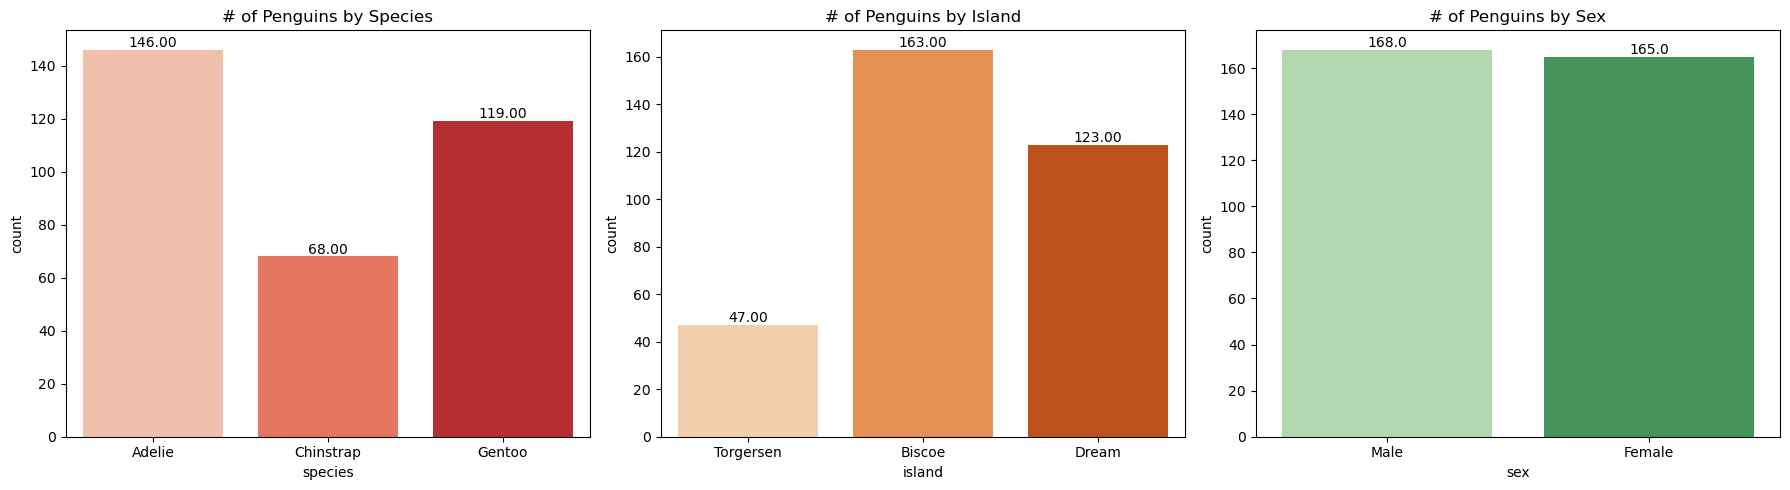

In [16]:
# Create a figure with 3 subplots for each of the categorical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for `species`` column
cplot = sns.countplot(x='species', data=df, ax=axes[0], palette='Reds')
axes[0].set_title('# of Penguins by Species')
for p in cplot.patches: # Add annotations as shown in https://github.com/mwaskom/seaborn/issues/1582
    cplot.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center', 
                        va = 'top', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

# Plot for `island` column
cplot = sns.countplot(x='island', data=df, ax=axes[1], palette='Oranges')
axes[1].set_title('# of Penguins by Island')
for p in cplot.patches: # Add annotations as shown in https://github.com/mwaskom/seaborn/issues/1582
    cplot.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center', 
                        va = 'top', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

# Plot for `sex` column
cplot = sns.countplot(x='sex', data=df, ax=axes[2], palette='Greens')
axes[2].set_title('# of Penguins by Sex')
for p in cplot.patches: # Add annotations as shown in https://github.com/mwaskom/seaborn/issues/1582
    cplot.annotate(format(p.get_height(), ''), 
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center', 
                        va = 'top', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

# Adjust layout to prevent clipping & show plot
plt.tight_layout()
plt.show()

**Findings**:
- It's evident that sample sizes vary greatly when looking at species and island, but the data is normally distributed between sexes with a 50% split.
- The data collected contains three unique values for species, with the highest count being for _Adelie_ with 146 entries and the lowest for _Chinstrap_ totaling 68 rows.
- Biscoe island is the place where most penguins live (163 of them) and Torgersen is the least inhabited island with a count of 47 penguins.

#### <a id='toc5_1_2_'></a>[Numeric variables](#toc0_)

Apart from the above categorical variables, the dataset contains four numerical variables: 
- `bill_length_mm` and `bill_depth_mm` measure the culmen, the upper ridge of a bird’s bill.<sup>[1]</sup>
- `flipper_length_mm` referes to the swimming appendages of aquatic vertebrates that are not fish.<sup>[2]</sup>
- `body_mass_g` represent penguins' body weight in grams.

All of these variables are classified as continuous data given they all represents measurements, which cannot be counted and can only be described using intervals on the real number line.<sup>[3]</sup> Therefore, given that measurements are not something we can get as countable whole and a higher level of precision is required, these data points are represented by [floating-point numbers](https://en.wikipedia.org/wiki/Floating-point_arithmetic#IEEE_754:_floating_point_in_modern_computers).

For a better understanding, we'll proceed to create [histograms for each variable](https://seaborn.pydata.org/generated/seaborn.histplot.html), which are a great tool for visualizing the distribution of a single continuous variable.<sup>[4]</sup> As per [Seaborn official documentation,](https://seaborn.pydata.org/tutorial/distributions.html) _a histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar_. For better readibility and user-friendliness, we'll make use of Matplotlib's [`subplots` utility wrapper](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to visualise the plots in one figure.

<sup>References:
<br>[1] <a href="https://github.com/allisonhorst/palmerpenguins
/">palmerpenguins GitHub repository</a>
<br>[2] <a href="https://en.wikipedia.org/wiki/Flipper_(anatomy)">Wikipedia's article about Flippers</a>
<br>[3] <a href="https://www.dummies.com/article/academics-the-arts/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal-169735/">Types of Statistical Data: Numerical, Categorical, and Ordinal</a>
<br>[4] <a href="https://www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram/">How to Make a Seaborn Histogram: A Detailed Guide</a>
</sup>


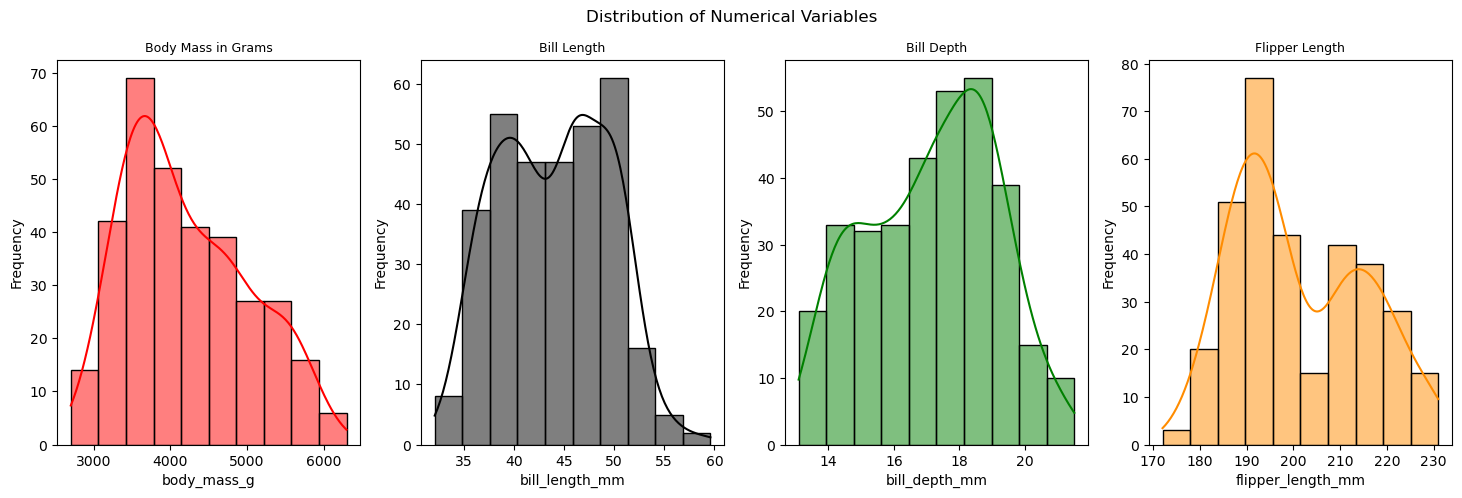

In [17]:
# Create a figure with 4 subplots for each of the numerical columns
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Plot for `body_mass_g` column
sns.histplot(data=df,
              x='body_mass_g',  # Set variable to be plotted
              ax=axes[0],       # Set the subplot axis where the histogram will be placed
              color='red',      # Define color
              bins=10,          # Define number of bins
              kde=True)         # Add Kernel Density Estimation to create a line curve that can help visualize the overall trends
axes[0].set_title('\nBody Mass in Grams')
axes[0].title.set_size(9)       # Set title size as in https://pythonguides.com/matplotlib-title-font-size/
axes[0].set_ylabel('Frequency')

# Plot for `bill_length_mm` column
sns.histplot(data=df,
              x='bill_length_mm',   
              ax=axes[1],           
              color='black',        
              bins=10,              
              kde=True)             
axes[1].set_title('\nBill Length')
axes[1].title.set_size(9)
axes[1].set_ylabel('Frequency')

# Plot for `bill_depth_mm` column
sns.histplot(data=df,
              x='bill_depth_mm',   
              ax=axes[2],          
              color='green',       
              bins=10,             
              kde=True)            
axes[2].set_title('Bill Depth')
axes[2].title.set_size(9)
axes[2].set_ylabel('Frequency')

# Plot for `flipper_length_mm` column
sns.histplot(data=df,
              x='flipper_length_mm', 
              ax=axes[3],            
              color='darkorange',   
              bins=10,               
              kde=True)              
axes[3].set_title('Flipper Length')
axes[3].title.set_size(9)
axes[3].set_ylabel('Frequency')

# Set subplot title and show plots
plt.suptitle("Distribution of Numerical Variables\n")
plt.show()

**Findings:**
- The body mass and bill depth variables could potentially have a normal distribution, with body mass showing a bit of right skewness and bill depth some left skewness. This would be the most standard distribution where observations are clustered around the mean - which resembles a the bell curve.<sup>[1][2]</sup>
- Flipper length and bill length show characteristics of bimodal distribution due to the two peaks, which further enhances the analysis on categorical variables that demonstrated the different samples size. The presence of multiple characteristics between subgroups (by species, island, or sex) prompts the need for a bivariate investigation.<sup>[3]</sup>

<sup>References:
<br>[1] <a href="https://numpy.org/doc/1.16/reference/generated/numpy.random.normal.html#numpy.random.normal/">NumPy's Normal Distribution</a>
<br>[2] <a href="https://www.simplilearn.com/tutorials/statistics-tutorialwhat-is-probability-distribution">What is a Probability Distribution</a>
<br>[3] <a href="https://towardsdatascience.com/all-the-distributions-you-need-to-know-ad570514987b">All the Distributions You Need to Know</a>
</sup>

---

## <a id='toc6_'></a>[Bivariate Analysis](#toc0_)

In this section, we'll be exploring the relationship between two different variables and understanding the correlation and patterns between them.

### <a id='toc6_1_'></a>[Sample distribution in each island](#toc0_)

Using [Pandas `plot.pie()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html), let's drawn a pie visualisation to depict rhe distribution of species across the three different islands.

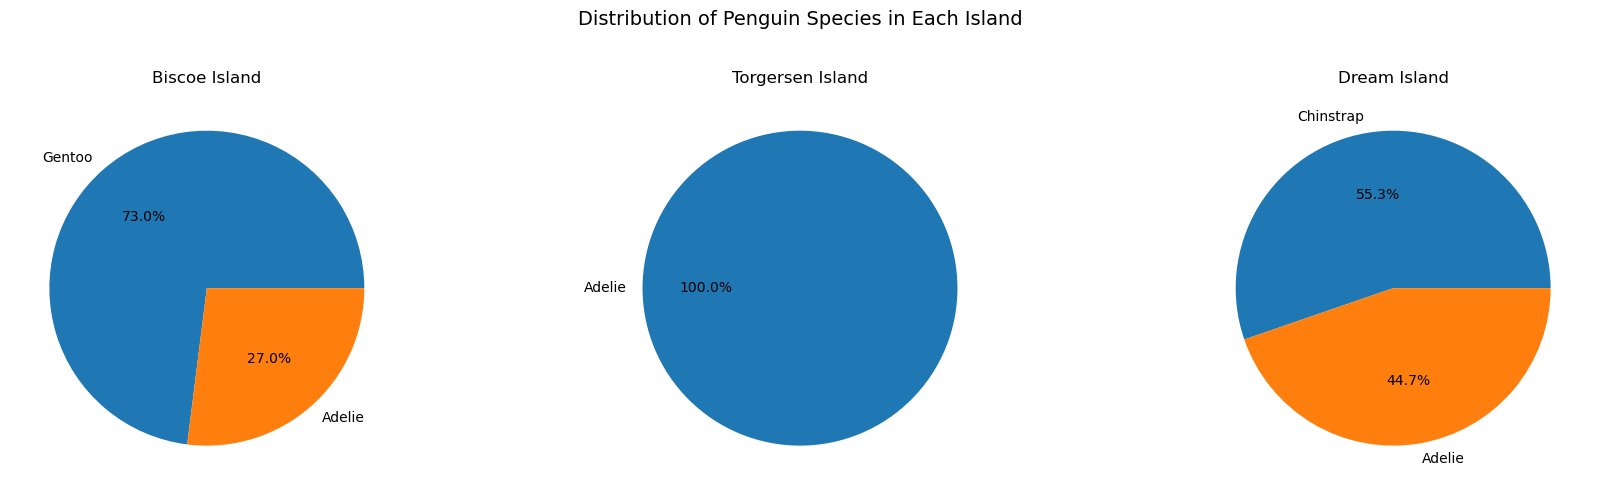

In [18]:
# Create a figure with 4 subplots for each of the numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Filter the DataFrame by Biscoe island & plot pie chart
biscoe = df[df['island'] == 'Biscoe']
biscoe['species'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('Biscoe Island')  # Set title
axes[0].set_ylabel('')              # Hide the y-axis label to avoid cluttering

# Filter the DataFrame by Biscoe island & plot pie chart
torgersen = df[df['island'] == 'Torgersen']
torgersen['species'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1])
axes[1].set_title('Torgersen Island')
axes[1].set_ylabel('')  

# Filter the DataFrame by Biscoe island & plot pie chart
dream = df[df['island'] == 'Dream']
dream['species'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[2])
axes[2].set_title('Dream Island')
axes[2].set_ylabel('')  

# Set subplot title
plt.suptitle("Distribution of Penguin Species in Each Island\n", fontsize=14)

# Adjust layout to prevent clipping & show plot
plt.tight_layout()
plt.show()

**Findings:**
- Adelie penguins are the only ones present in both three islands.
- The Chinstrap species exclusively inhabits the Dream island, while Gentoo penguins reside in Biscoe island.   

### <a id='toc6_2_'></a>[Sex distribution across species and islands](#toc0_)

Using [Matplotlib stacked bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html), let's analyse the gender distribution for each island and species. 

<sup>**_Note_:** _The below code was largely inspired by [the here linked demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py) available in Matplotlib official documentation._</sup>

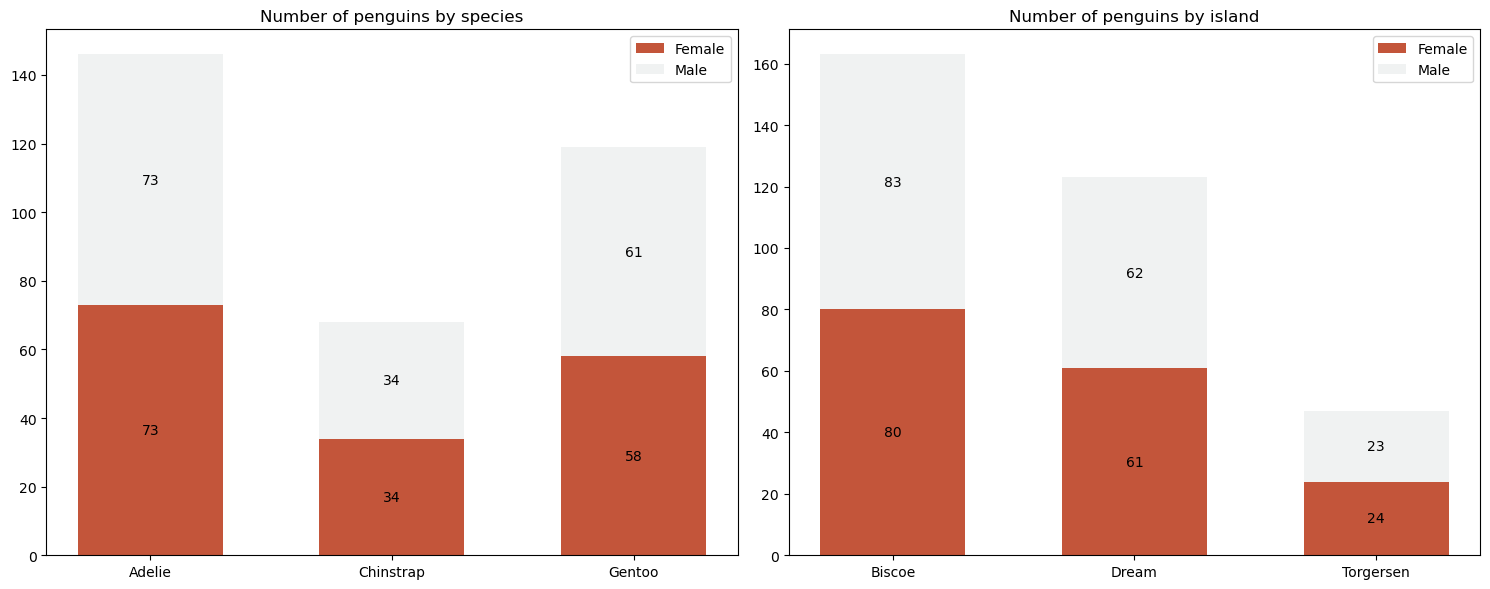

In [19]:
# Pivot the d to create a table suitable for plotting stacked bar chart
pivot_table_species = df.pivot_table(index='species', columns='sex', aggfunc='size', fill_value=0)
pivot_table_island = df.pivot_table(index='island', columns='sex', aggfunc='size', fill_value=0)

# Define the width of the bars
width = 0.6

# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Initialize bottom values for stacking bars
bottom_species = np.zeros(len(pivot_table_species.index))
bottom_island = np.zeros(len(pivot_table_island.index))

# Define the diverging color palette
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Plot stacked bars for species
for i, sex in enumerate(pivot_table_species.columns):
    p_species = ax[0].bar(pivot_table_species.index, 
                          pivot_table_species.iloc[:, i], 
                          width, 
                          label=sex, 
                          bottom=bottom_species, 
                          color=cmap(i / len(pivot_table_species.columns)))
    bottom_species += pivot_table_species.iloc[:, i]

    # Add labels to the bars
    ax[0].bar_label(p_species, label_type='center')

# Plot stacked bars for island
for i, sex in enumerate(pivot_table_island.columns):
    p_island = ax[1].bar(pivot_table_island.index, 
                         pivot_table_island.iloc[:, i], 
                         width, 
                         label=sex, 
                         bottom=bottom_island, 
                         color=cmap(i / len(pivot_table_island.columns)))
    bottom_island += pivot_table_island.iloc[:, i]

    # Add labels to the bars
    ax[1].bar_label(p_island, label_type='center')

# Add labels and title for the first plot
ax[0].set_title('Number of penguins by species')
ax[0].legend()

# Add labels and title for the second plot
ax[1].set_title('Number of penguins by island')
ax[1].legend()

# Adjust layout to prevent clipping and show plot
plt.tight_layout()
plt.show()

**Findings:**

The above plot further confirms the 50% gender split across the different islands and species, with no obvious predominant sex.

### <a id='toc6_3_'></a>[Attribute pairs by species](#toc0_)

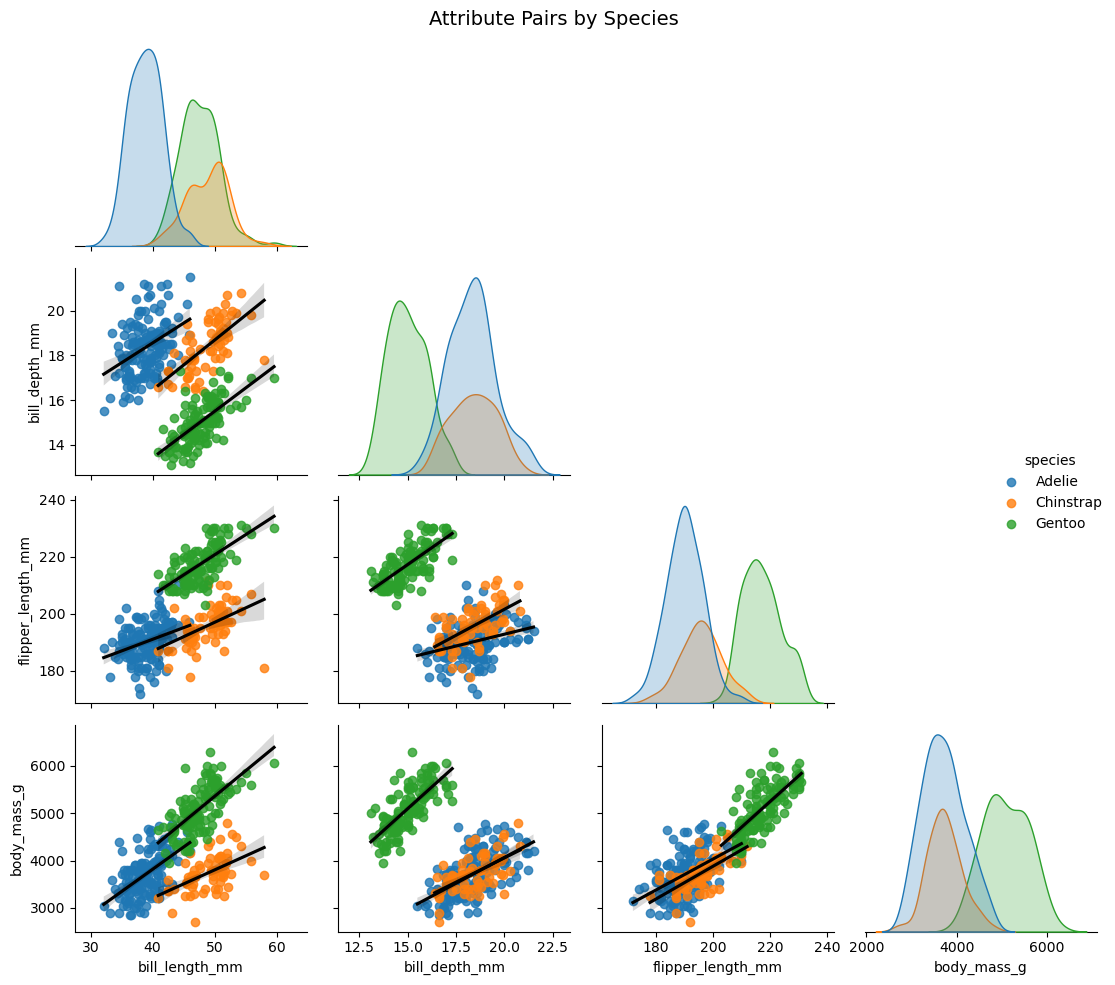

In [20]:
# Plot a pairplot to analyse the interaction between the different variables
sns.pairplot(df,hue="species", corner=True, kind="reg",plot_kws={'line_kws':{'color':'black'}})

# Add labels and title for the second plot
plt.suptitle("Attribute Pairs by Species", fontsize=14)

# Adjust layout to prevent clipping and show plot
plt.tight_layout()
plt.show()

**Findings:**

- Gentoo penguins have the largest flipper length comparatively to the other two species, which have similar ranges.
- Adelie species display the lowest bill and flipper lengths, but closely aligns with Chinstrap in terms of bill depth.
- There seems to be a linear relationship between flipper length and body mass, given that penguins that have higher lengths are also consistently heavier. This pattern suggests that there is a high chance of these two variables being correlated.

### <a id='toc6_4_'></a>[Attribute pairs by island](#toc0_)

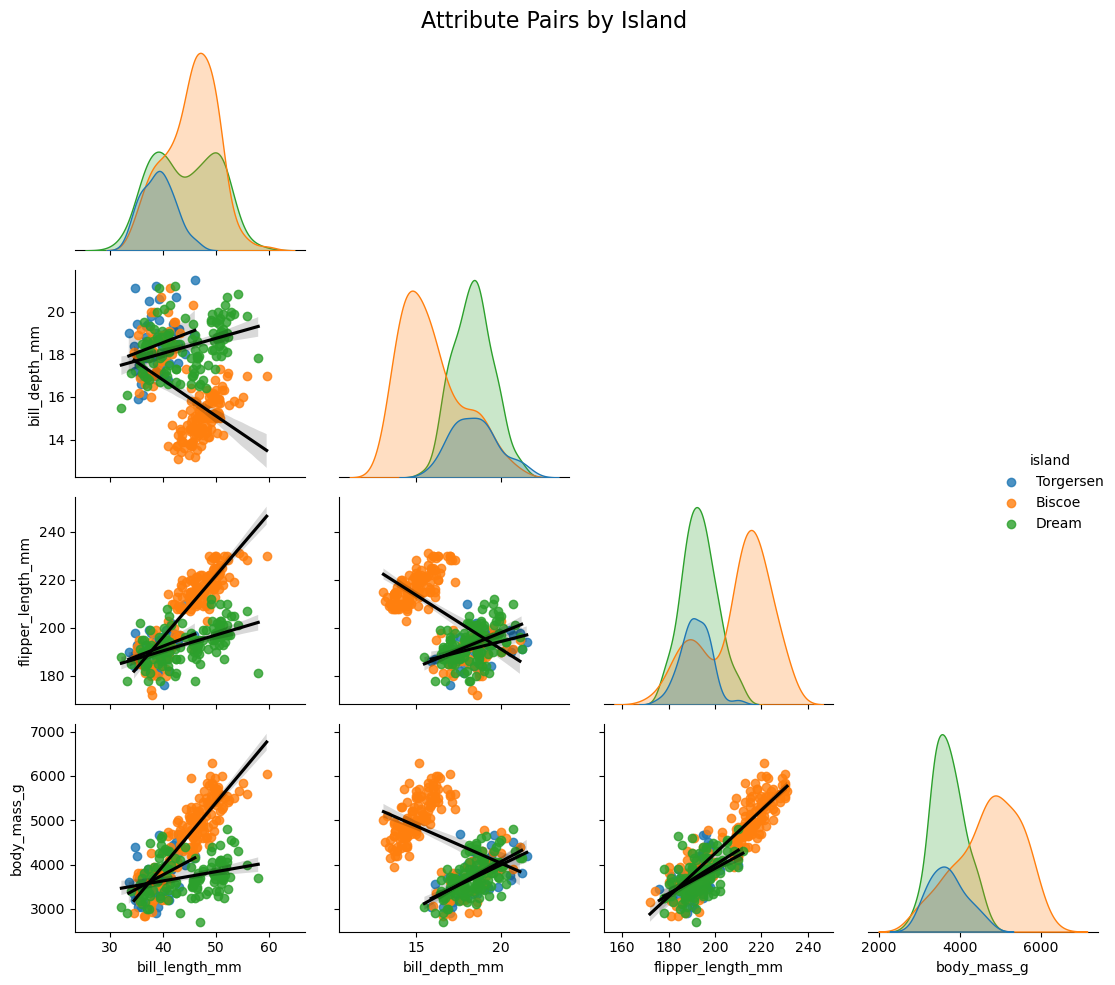

In [21]:
# Plot a pairplot to analyse the interaction between the different variables
# https://python-charts.com/correlation/pairs-plot-seaborn/
sns.pairplot(df,hue="island", corner=True, kind="reg",plot_kws={'line_kws':{'color':'black'}})

# Add labels and title for the second plot
plt.suptitle("Attribute Pairs by Island", fontsize=16)

# Adjust layout to prevent clipping and show plot
plt.tight_layout()
plt.show()

**Findings:**

The above scatterplots reveal the same patterns discussed in the previous section across all islands. However, the segregation by island shows that the place where penguins inhabit is less correlated to their physical attributes, unlike the species variables. Despite this, the linear relationship between body mass and flipper length is further confirmed.

## <a id='toc7_'></a>[Multivariate Analysis](#toc0_)

For multivariate analysis, focus will be on analysing the interactions between features, as well as their correlations.

<sup>References:
<br>[1] <a href="https://realpython.com/numpy-scipy-pandas-correlation-python/">NumPy, SciPy, and pandas: Correlation With Python</a>
<br>[2] <a href="https://towardsdatascience.com/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6
">A Data Scientist’s Essential Guide to Exploratory Data Analysis</a>
<br>[3] <a href="https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:~:text=In%20simple%20words%2C%20both%20the,linear%20relationship%20between%20two%20variables">Baffled by Covariance and Correlation? Get the Math and the Application in Analytics for both the terms.</a>
</sup>

### <a id='toc7_1_'></a>[Correlation](#toc0_)

In order to gain a deeper knowledge on the apparently linear relationship between body mass and flipper length, we'll compute a pairwise correlation of columns  with [Pandas `.corr()`function`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) to determine the _strength_ of that relationship.

By default, Pandas calculates the correlation using [Pearson Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which is sensitive to the manner in which the variables are sampled, as it assumes a normal distribution. It calculates the covariance between the two variables and normalizes it by the product of their standard deviations. 

$$
r_{xy} = \frac{{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}}{{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}}
$$

- $r_{xy}$	    =	correlation coefficient
- $x_{i}$	    =	values of the x-variable
- $\bar{x}$ 	=	mean of the values of the x-variable
- $y_{i}$	    =	values of the y-variable
- $\bar{y}$	    =	mean of the values of the y-variable

The resulting coefficient ranges from -1 to 1, where positive values indicate a positive correlation, whereas negative values suggest an inverse correlation. If the score is 0 then there is no linear correlation between the variables.
    
For a more appealing readability, the correlation matrix will be plotted in a [Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) as demonstrated in the [here linked Medium article](https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b).

<sup>References:
<br>[1] <a href="https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e">How to Create a Seaborn Correlation Heatmap in Python?</a>
<br>[2] <a href="https://datagy.io/seaborn-heatmap/">Seaborn heatmap: A Complete Guide</a>
<br>[3] <a href="https://datagy.io/python-correlation-matrix/)">Calculate and Plot a Correlation Matrix in Python and Pandas</a>
</sup>

Text(0.5, 1.0, 'Overall Population Correlation Matrix')

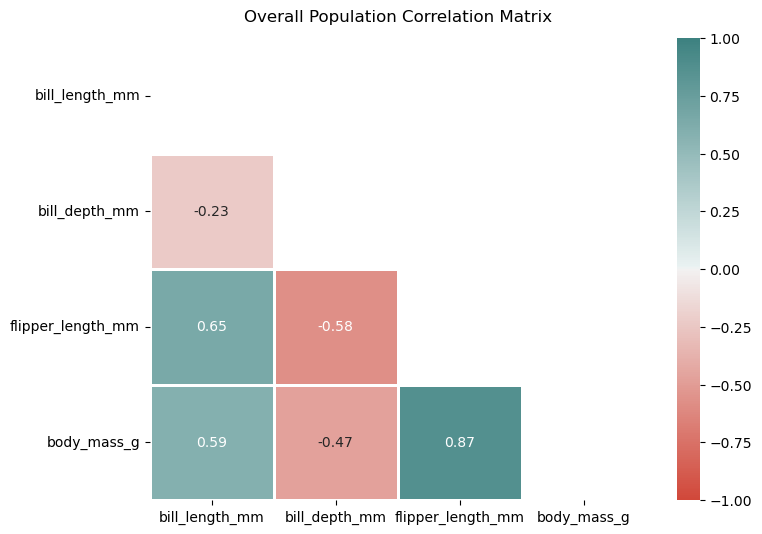

In [22]:
# First calculate correlation matrix with .corr(). Since pandas version 2.0.0, the default value of numeric_only is now False, 
# so this param needs to be set as True due to the 3 categorical variables in the dataset
corr = df.corr(numeric_only=True)

# Adjust heatmap size
plt.figure(figsize=(8, 6))

# Remove the redudant upper half as well as the diagonal line of 1s to declutter the visual
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define colour map
cmap = sns.diverging_palette(15, 190, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr, annot=True, 
            linewidth=1, 
            cmap=cmap, 
            vmax=1, 
            vmin=-1,
            mask=mask )

# As Seaborn is built on top of matplolib we can use the title function
plt.title('Overall Population Correlation Matrix',fontdict={'fontsize':12}, pad=12, loc='center')

**Findings:**

Scoring a whooping 0.87, the correlation between flipper length and body mass is quite strong when looking at the general population. However, to understand if this is applicable across all species we'll create a heatmap for each three of them separately.<sup>[1]</sup>

<sup>References:
<br>[1] <a href="https://stackoverflow.com/questions/73380126/plot-seaborn-heatmaps-side-by-side-with-for-loop">Stack Overflow</a>
</sup>

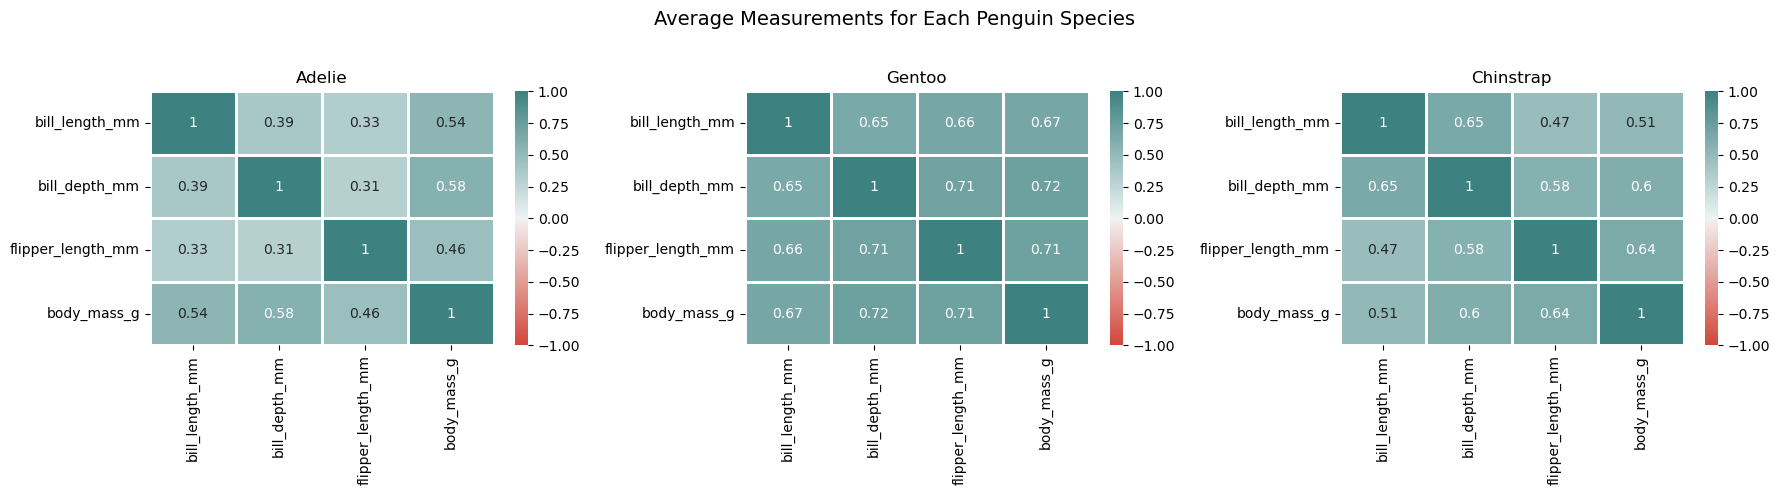

In [23]:
# Create a figure with 3 subplots for each species
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Filter the DataFrame by Adelie species, calculate corr & plot heatmap
adelie = df[df['species'] == 'Adelie']      # Filter the DataFrame
corr = adelie.corr(numeric_only=True)       # Compute correlation  matrix
sns.heatmap(corr,                         # Plot the heatmap
            annot=True,
            linewidth=1, 
            ax=axes[0], 
            vmin=-1, 
            vmax=1, 
            cmap=cmap)
axes[0].set_title("Adelie")                 # Set title identifying the species

# Filter the DataFrame by Gentoo species, calculate corr & plot heatmap
gentoo = df[df['species'] == 'Gentoo']      # Filter the DataFrame
corr = gentoo.corr(numeric_only=True)       # Compute correlation  matrix
sns.heatmap(corr,                         # Plot the heatmap
            annot=True,
            linewidth=1, 
            ax=axes[1], 
            vmin=-1, 
            vmax=1, 
            cmap=cmap)
axes[1].set_title("Gentoo")                 # Set title identifying the species

# Filter the DataFrame by Chinstrap species, calculate corr & plot heatmap
chinstrap = df[df['species'] == 'Chinstrap']   # Filter the DataFrame
corr = chinstrap.corr(numeric_only=True)       # Compute correlation  matrix
sns.heatmap(corr,                         # Plot the heatmap
            annot=True,
            linewidth=1, 
            ax=axes[2], 
            vmin=-1, 
            vmax=1, 
            cmap=cmap)
axes[2].set_title("Chinstrap")                     # Set title identifying the species

# Set figure suptitle
plt.suptitle("Correlation Matrix by Species\n", fontsize=14)

# Adjust layout to prevent clipping & show plot
plt.tight_layout()
plt.show()

**Findings:**

When segregating the heatmaps by species, the correlation score is less stronger, especially for Adelie and Chinstrap with 0.46 and 0.64, respectively. Nevertheless, for Gentoo penguins the correlation is still quite strong at 0.71, even if not as significant as in the overall population heatmap.

### <a id='toc7_2_'></a>[Best fit](#toc0_)

Given the strength of relationship between body mass and flipper length for Gentoo species, we'll fit a regression line to display the connection between scattered data points in a linear fashion. A [regression line](https://www.geeksforgeeks.org/what-is-regression-line/) is a straight line that reflects the best fit connection between an independent variable (flipper length) and a dependent variable (body mass). 

To achieve this, we'll call [Numpy's `polyfit()`method](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) that uses the ordinary least squares method (also known as OLS).

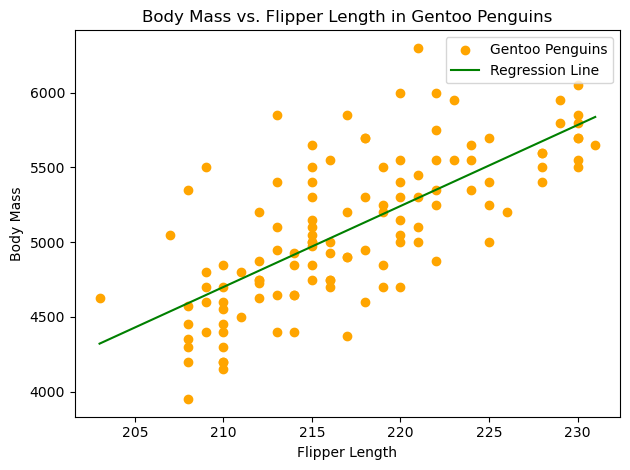

In [24]:
# Extract the variables to which the line will be fitted
x = gentoo['flipper_length_mm']
y = gentoo['body_mass_g']

# Create the scatter plot
plt.scatter(x, y, color='orange', label='Gentoo Penguins')

# Fit the regression line which will return the coefficients (slope & intercept) for 1 degree
coefficient, intercept = np.polyfit(x, y, 1)

# Take the array returned by polyfit to calculate the prediction y = coefficient * x - 3.intercept
predict = np.poly1d([coefficient, intercept])

# Generate x-values range with linspace for the regression line with min and max flipper length
# https://stackoverflow.com/questions/62106028/what-is-the-difference-between-np-linspace-and-np-arange
# https://realpython.com/np-linspace-numpy/
x_line = np.linspace(min(x), max(x), 100)

# Generate y-values for the regression line
y_line = predict(x_line)

# Plot the regression line
plt.plot(x_line, y_line, color='green', label='Regression Line')

# Add labels and legend
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')
plt.title('Body Mass vs. Flipper Length in Gentoo Penguins')
plt.legend()

# Adjust layout to prevent clipping & show plot
plt.tight_layout()
plt.show()

**Findings:**

The regression line above confirms the correlation score calculated earlier for Gentoo penguins, with the relationship between the two variables being molded in a linear fashion: as one increases the other tends to also increase.  It's noteworthy, however, that the phrease _correlation does not imply causation_ is here applicable, given that this does not mean that one variables is the result of the size of the other.

---

## <a id='toc8_'></a>[Notes](#toc0_)

Markdowns formatting of this Jupyter Notebook were based on:
* [The Jupyter Notebook Formatting Guide](https://medium.com/pythoneers/jupyter-notebook-101-everything-you-need-to-know-56cda3ea76ef) by Raghu Prodduturi
* [Markdown Cheat Sheet](https://markdownguide.offshoot.io/cheat-sheet/)
* [Markdown Extended Syntax](https://markdownguide.offshoot.io/extended-syntax)
* [Introduction to LaTeX for Jupyter Notebooks](http://chebe163.caltech.edu/2018w/handouts/intro_to_latex.html)


---
#### <a id='toc8_1_1_'></a>[End](#toc0_)
